# Tools for generating cell placements

Although users are always welcomed to place their neuronal somata according to their own custom generated positions, BMTK provides several tools to facilitate this placement, including simple geometries and placement based on geometries or densities from \*.nrrd files.

## Generate a cylindrical column of cell positions

This function places random locations uniformly within a cylinder or cylindrical ring. Note that 'y' is the vertical axis.

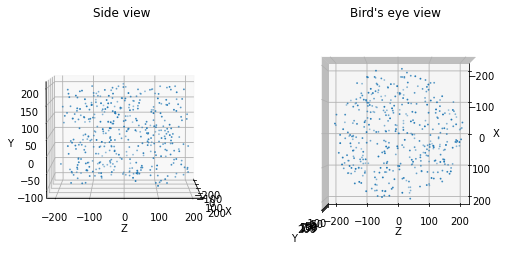

In [1]:
from bmtk.builder.auxi.node_params import positions_columnar

positions = positions_columnar(400, center=[0.0, 50.0, 0.0], height=300.0, min_radius=0.0, max_radius=200,
                        plot=True)

We can also use this function to create a cylindrical ring of locations. For instance, in the V1 model, this method was used to introduce a surround of less computationally intensive unit types around the core of biophysically detailed units.

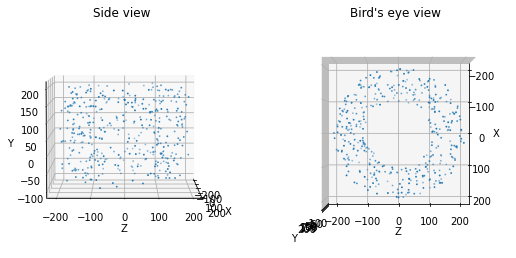

In [2]:
positions = positions_columnar(400, center=[0.0, 50.0, 0.0], height=300.0, min_radius=100.0, max_radius=200,
                        plot=True)

## Generate a rectangular prism volume of cell positions

Alternatively, if a sheet of cells (with some thickness) or other such geometry is desired, the following function can be used. 

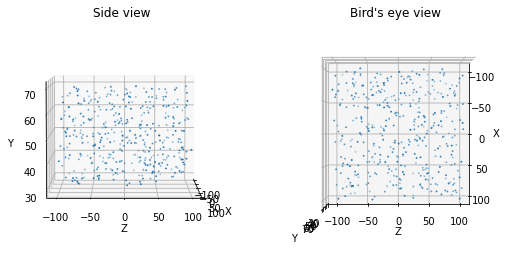

In [3]:
from bmtk.builder.auxi.node_params import positions_rect_prism

positions = positions_rect_prism(400, center=[0.0, 50.0, 0.0], height=20.0, x_length=100.0, z_length=100.0, plot=True)

## Generate an ovoid volume of cell positions
Lastly, if an ellipsoid is desired, e.g., to simulate a nucleus, one can use the following function:

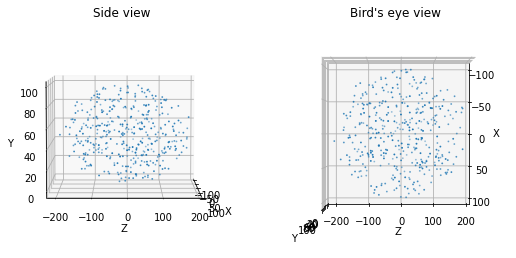

In [4]:
from bmtk.builder.auxi.node_params import positions_ellipsoid

positions = positions_ellipsoid (400, center=[0.0, 50.0, 0.0], height=50.0, x_length=100.0, z_length=200.0, plot=True)

## Generate random locations according to a \*.nrrd file 

We may want to place the units according to a file containing 3D location information, such as the [Allen Brain Atlas Common Coordinate Frame](https://help.brain-map.org/display/mouseconnectivity/API#API-DownloadAtlas3-DReferenceModels). You can obtain a structural mask that describes the extent of a structure of interest. Cells will be placed randomly within that structure at a density of max_dens. If the \*.nrrd file contains varying cell densities, this function can also be used to place cells randomly according to that density raster.

You will need to install the ```pynrrd``` library to use this function.

Note that the units of cell density are in cells/mm<sup>3</sup> while positions are in units of microns.

If the structure is bilateral and only one half is desired for modeling, you can specify the axis along which to split it.

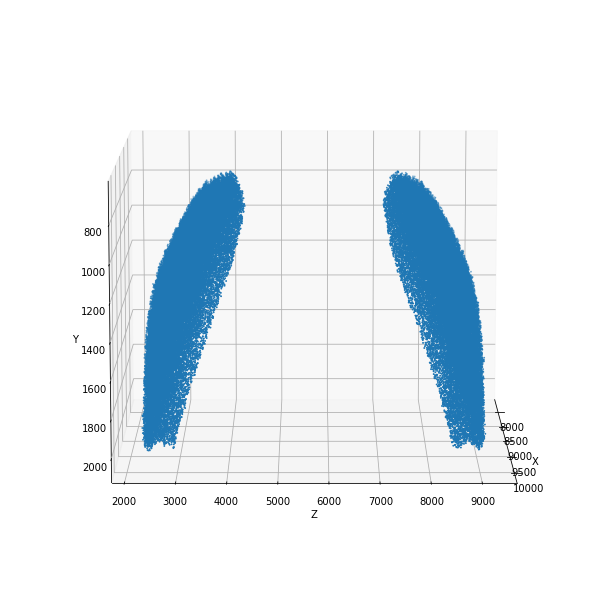

In [5]:
from bmtk.builder.auxi.node_params import positions_nrrd
filename = 'structure_721.nrrd'
max_dens = 100000       # Cells per mm^3

positions = positions_nrrd(filename, max_dens, plot=True)

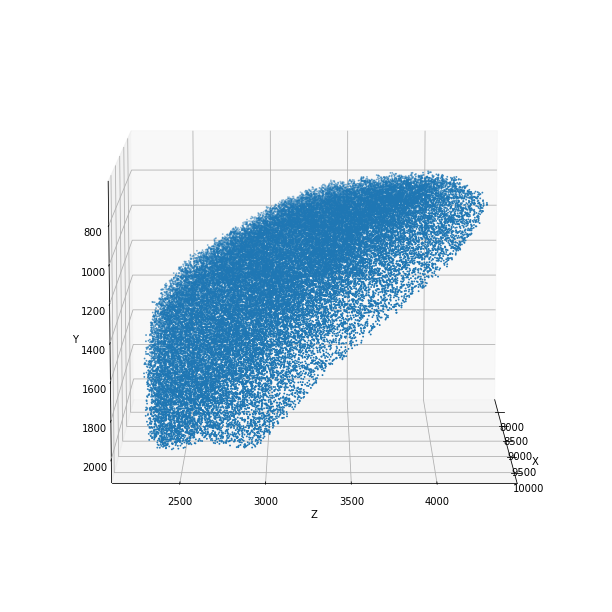

In [6]:
positions = positions_nrrd(filename, max_dens, split_bilateral='z', plot=True)

You can also directly use a 3-dimensional density matrix with the function ```positions_density_matrix``` to generate cell placements.